In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D,LeakyReLU
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

In [2]:
dir = "C:/Users/furka/Downloads/archive_dataset/dataset/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@","1","2","3","4","5","6","7","8","9"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [3]:
len(train_data)

98773

In [4]:
val_dir = "C:/Users/furka/Downloads/archive_dataset/dataset/Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [5]:
len(val_data)

4976

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)

In [7]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [8]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [10]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [11]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [12]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [13]:
print(train_X.shape,val_X.shape)

(98773, 32, 32, 1) (4976, 32, 32, 1)


In [14]:
print(train_Y.shape,val_Y.shape)

(98773, 26) (4976, 26)


In [15]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(32, 32, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),##
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [16]:
optimizer = RMSprop(learning_rate=0.002,
    rho=0.9,
    momentum=0.1,
    epsilon=1e-07,
    centered=True,
    name='RMSprop')
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
batch_size = 32
num_classes = 26
epochs = 50

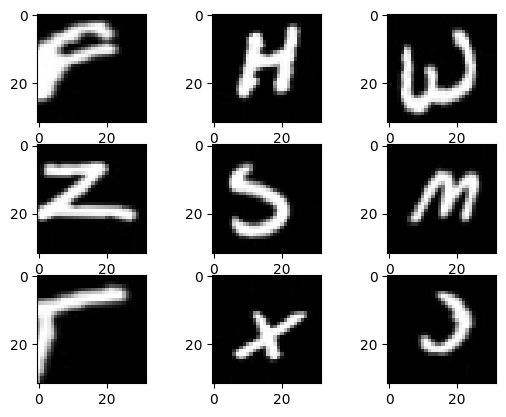

In [18]:
datagen_try = ImageDataGenerator(rotation_range=15,
                             width_shift_range = 0.15,
                             height_shift_range = 0.15,
                             shear_range = 0.15,
                             zoom_range = 0.4,)
datagen_try.fit(train_X)
for x_batch, y_batch in datagen_try.flow(train_X, train_Y, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
	plt.show()
	break

In [19]:
datagen_train = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.4,
                                   horizontal_flip = False)

datagen_val = ImageDataGenerator() 


step_train = train_X.shape[0] // batch_size
step_val = val_X.shape[0] // batch_size

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss',    # Quantity to be monitored.
    factor=0.25,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

In [20]:
history = model2.fit_generator(datagen_train.flow(train_X, train_Y, batch_size=batch_size),
                              steps_per_epoch=len(train_X)//batch_size,
                              epochs=epochs,
                              validation_data=(val_X, val_Y),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=2)

Epoch 1/50
3086/3086 - 82s - loss: 0.7742 - accuracy: 0.7721 - val_loss: 0.6780 - val_accuracy: 0.8734 - lr: 0.0020 - 82s/epoch - 27ms/step
Epoch 2/50
3086/3086 - 75s - loss: 0.4114 - accuracy: 0.8801 - val_loss: 0.2385 - val_accuracy: 0.9461 - lr: 0.0020 - 75s/epoch - 24ms/step
Epoch 3/50
3086/3086 - 96s - loss: 0.3443 - accuracy: 0.8991 - val_loss: 0.1855 - val_accuracy: 0.9594 - lr: 0.0020 - 96s/epoch - 31ms/step
Epoch 4/50
3086/3086 - 91s - loss: 0.3123 - accuracy: 0.9089 - val_loss: 0.2120 - val_accuracy: 0.9592 - lr: 0.0020 - 91s/epoch - 30ms/step
Epoch 5/50
3086/3086 - 85s - loss: 0.2867 - accuracy: 0.9166 - val_loss: 0.2560 - val_accuracy: 0.9447 - lr: 0.0020 - 85s/epoch - 28ms/step
Epoch 6/50
3086/3086 - 94s - loss: 0.2684 - accuracy: 0.9204 - val_loss: 0.2449 - val_accuracy: 0.9524 - lr: 0.0020 - 94s/epoch - 30ms/step
Epoch 7/50
3086/3086 - 76s - loss: 0.2552 - accuracy: 0.9252 - val_loss: 0.1821 - val_accuracy: 0.9650 - lr: 0.0020 - 76s/epoch - 25ms/step
Epoch 8/50
3086/3086

In [21]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [22]:
def get_word(letter):
    word = "".join(letter)
    return word

In [23]:
def get_letters2(img):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    from imutils.contours import sort_contours
    import imutils

    letters = []

    image = cv2.imread(img)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    dilated = cv2.dilate(thresh1, None, iterations=2)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]

    thresh_1 = None
    thresh_2 = None
    thresh_3 = None

    # loop over the contours
    fig, axes = plt.subplots(len(cnts), 3, figsize=(15, 5))
    for i, c in enumerate(cnts):
        if cv2.contourArea(c) > 10:
            
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[y:y + h, x:x + w]
            thresh_1 = gray
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            print(thresh.shape)
            thresh_2 = thresh
            print(thresh.shape)
            # thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)
            # thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_NEAREST)
            thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_AREA)
            print(thresh.shape)
            thresh_3 = thresh
            thresh = thresh.astype("float32") / 255.0
            thresh = np.expand_dims(thresh, axis=-1)
            thresh = thresh.reshape(1, 32, 32, 1)
            ypred = model2.predict(thresh)
            confidence = np.max(ypred)
            if confidence < 0.7:
                print("Low confidence:", confidence)
            else:
                print("high confidence", confidence)
            # print("ypred : ", ypred )
            ypred = LB.inverse_transform(ypred)
            [x] = ypred
            print([x])
            letters.append(x)
    
        
        if len(cnts) == 1:
            axes[0].imshow(thresh_1, cmap='gray')
            axes[0].set_title('Original Grayscale')
            axes[0].axis('off')
            
            axes[1].imshow(thresh_2, cmap='gray')
            axes[1].set_title('Thresholded Image')
            axes[1].axis('off')
            
            axes[2].imshow(thresh_3, cmap='gray')
            axes[2].set_title('Resized to 32x32')
            axes[2].axis('off')
        else:
            axes[i,0].imshow(thresh_1, cmap='gray')
            axes[i,0].set_title('Original Grayscale')
            axes[i,0].axis('off')
            
            axes[i,1].imshow(thresh_2, cmap='gray')
            axes[i,1].set_title('Thresholded Image')
            axes[i,1].axis('off')
            
            axes[i,2].imshow(thresh_3, cmap='gray')
            axes[i,2].set_title('Resized to 32x32')
            axes[i,2].axis('off')
    
    plt.tight_layout()
    plt.show()
    print("letter 2 " )
    
    return letters, image


(83, 44)
(83, 44)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.9999894
['A']
(68, 44)
(68, 44)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 0.98300743
['H']
(64, 58)
(64, 58)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.98636544
['M']
(66, 38)
(66, 38)
(32, 32)
1/1 [==============================] - 0s 30ms/step
high confidence 0.99770194
['E']
(66, 66)
(66, 66)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.99999976
['T']


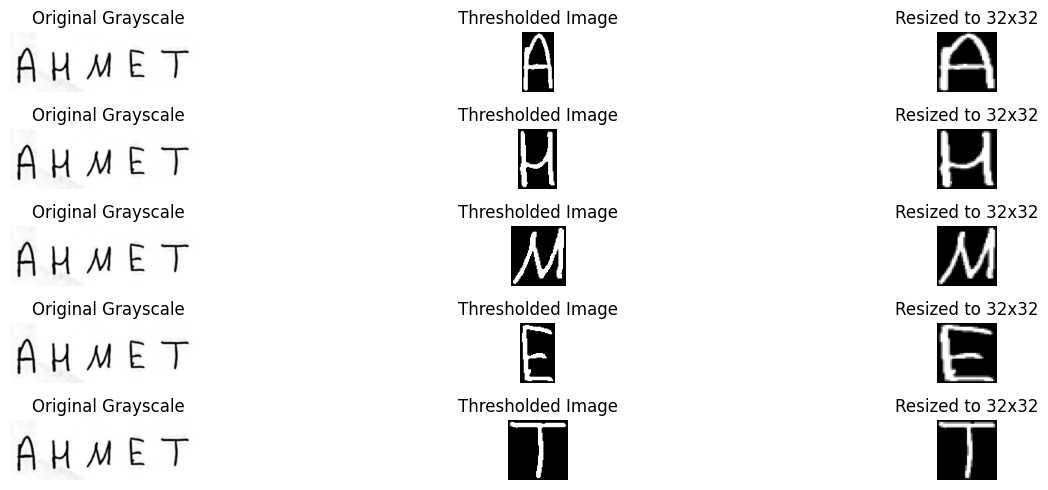

letter 2 
AHMET


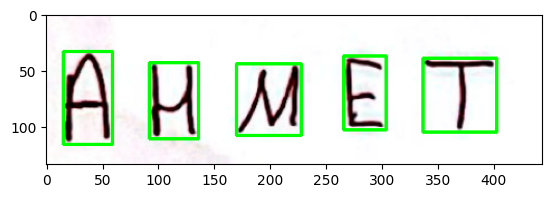

In [41]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\AHMET.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(81, 61)
(81, 61)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.99994063
['A']
(82, 70)
(82, 70)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 0.9990238
['R']
(83, 71)
(83, 71)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9999999
['D']
(78, 70)
(78, 70)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 1.0
['A']


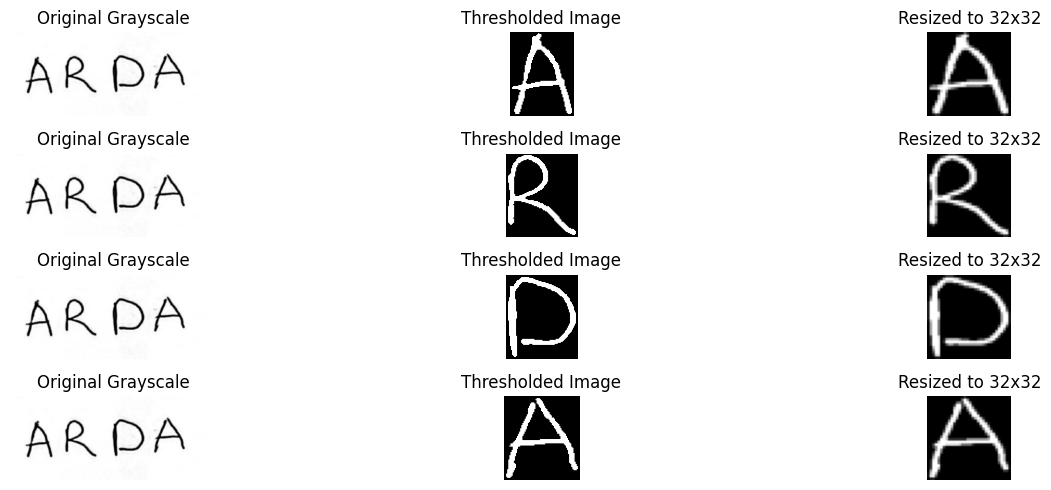

letter 2 
ARDA


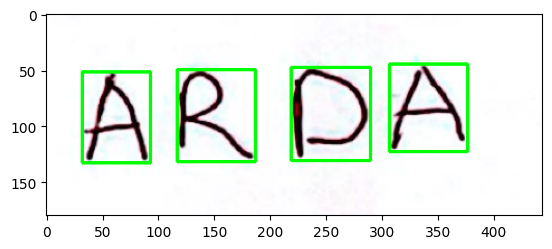

In [42]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\ARDA.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(71, 53)
(71, 53)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.997283
['B']
(64, 36)
(64, 36)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9988017
['A']
(61, 49)
(61, 49)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.9980708
['H']
(66, 40)
(66, 40)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 1.0
['A']
(76, 48)
(76, 48)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.74407357
['D']


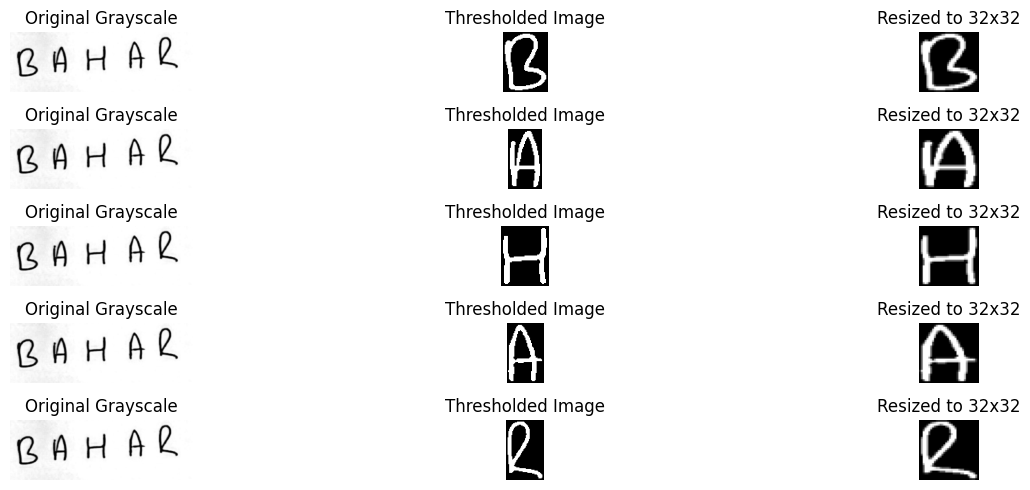

letter 2 
BAHAD


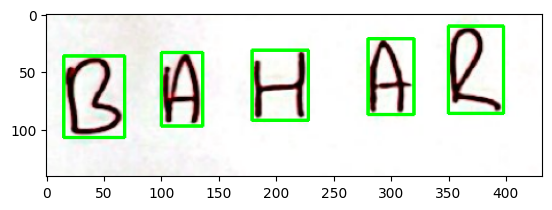

In [43]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\BAHAR.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(82, 53)
(82, 53)
(32, 32)
1/1 [==============================] - 0s 10ms/step
high confidence 0.9997675
['B']
(78, 44)
(78, 44)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.99317604
['E']
(74, 57)
(74, 57)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.7904826
['R']
(75, 43)
(75, 43)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.7862331
['L']
(70, 14)
(70, 14)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.86637515
['I']
(80, 76)
(80, 76)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.9947961
['N']


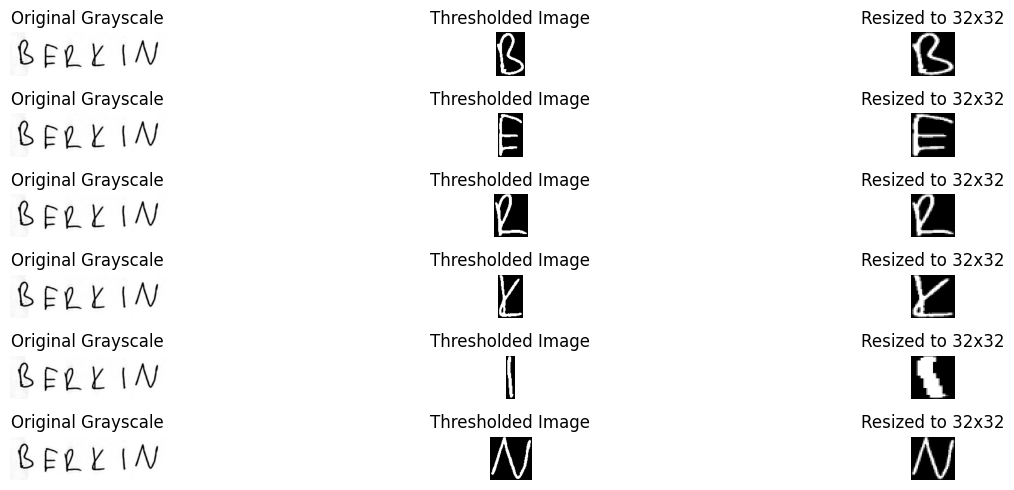

letter 2 
BERLIN


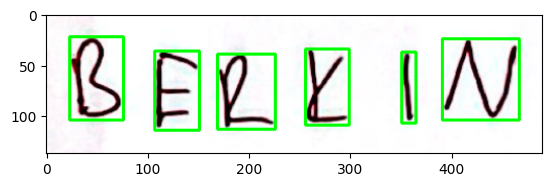

In [44]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\BERKIN.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(68, 52)
(68, 52)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99988794
['B']
(50, 48)
(50, 48)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.982714
['D']
(64, 58)
(64, 58)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9989322
['R']
(57, 60)
(57, 60)
(32, 32)
1/1 [==============================] - 0s 23ms/step
high confidence 0.99998796
['A']
(63, 44)
(63, 44)
(32, 32)
1/1 [==============================] - 0s 23ms/step
high confidence 1.0
['Y']


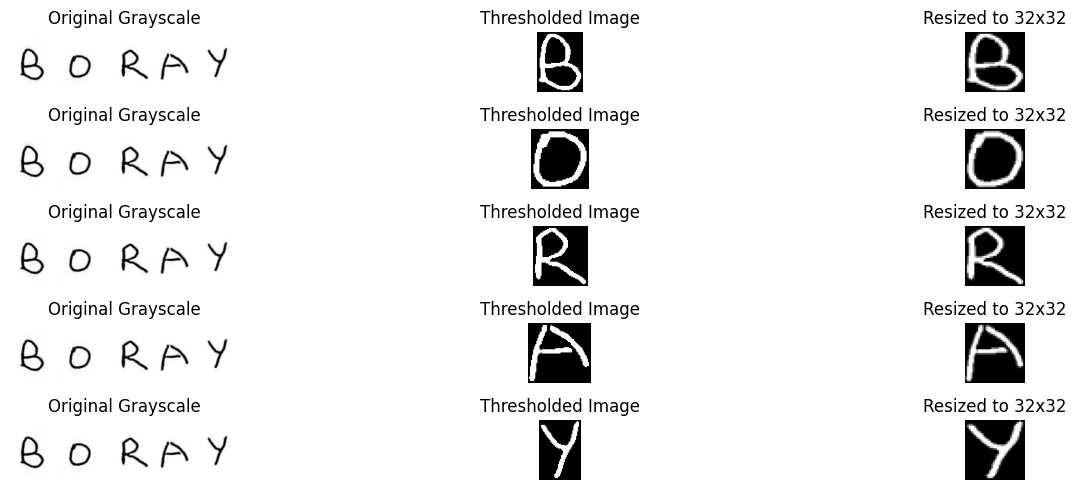

letter 2 
BDRAY


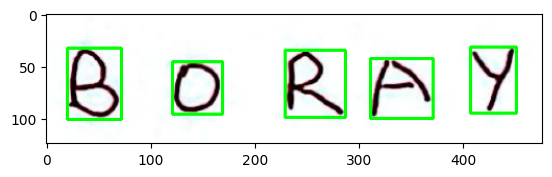

In [45]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\BORAY.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(68, 52)
(68, 52)
(32, 32)
1/1 [==============================] - 0s 25ms/step
high confidence 0.99997914
['B']
(62, 59)
(62, 59)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.95069206
['U']
(61, 62)
(61, 62)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.99980384
['R']
(61, 62)
(61, 62)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9999999
['A']
(60, 59)
(60, 59)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9999999
['K']


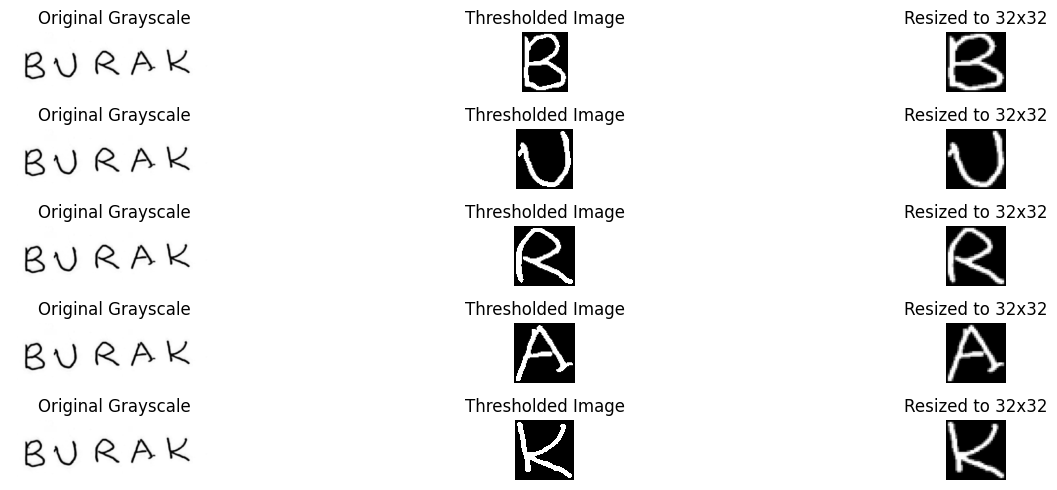

letter 2 
BURAK


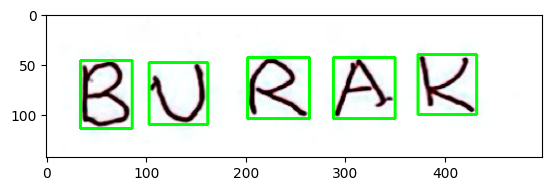

In [46]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\BURAK.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(67, 49)
(67, 49)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9058411
['E']
(56, 75)
(56, 75)
(32, 32)
1/1 [==============================] - 0s 12ms/step
high confidence 0.84217143
['M']
(71, 42)
(71, 42)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9940403
['R']
(62, 42)
(62, 42)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.85505766
['I']


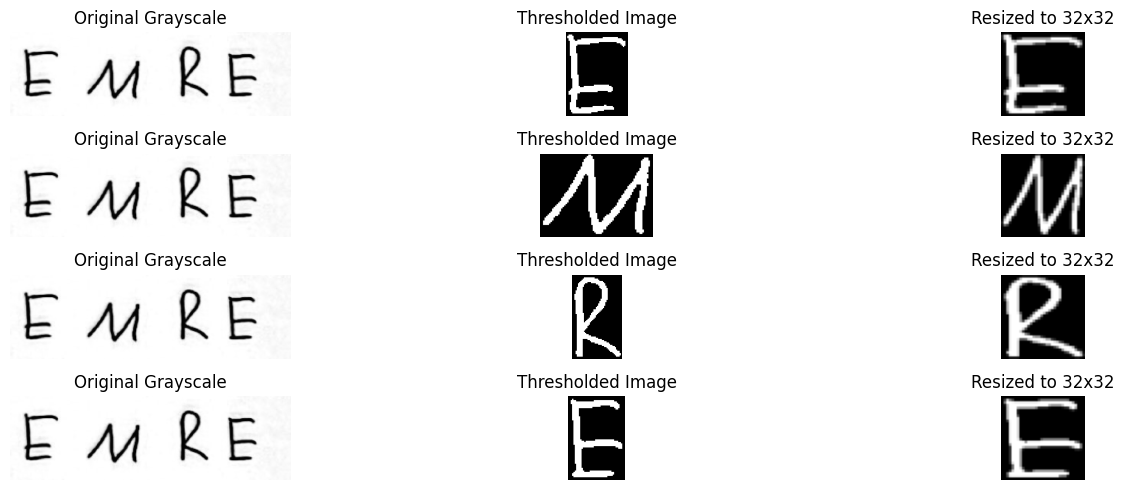

letter 2 
EMRI


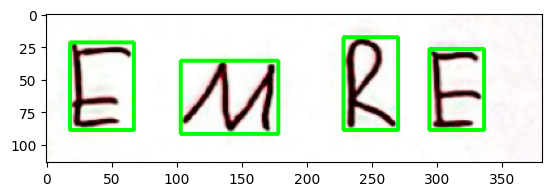

In [47]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\EMRE.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(59, 42)
(59, 42)
(32, 32)
1/1 [==============================] - 0s 19ms/step
Low confidence: 0.6641892
['T']
(54, 59)
(54, 59)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 0.9999999
['A']
(48, 13)
(48, 13)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.7967497
['K']
(52, 51)
(52, 51)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.999992
['K']


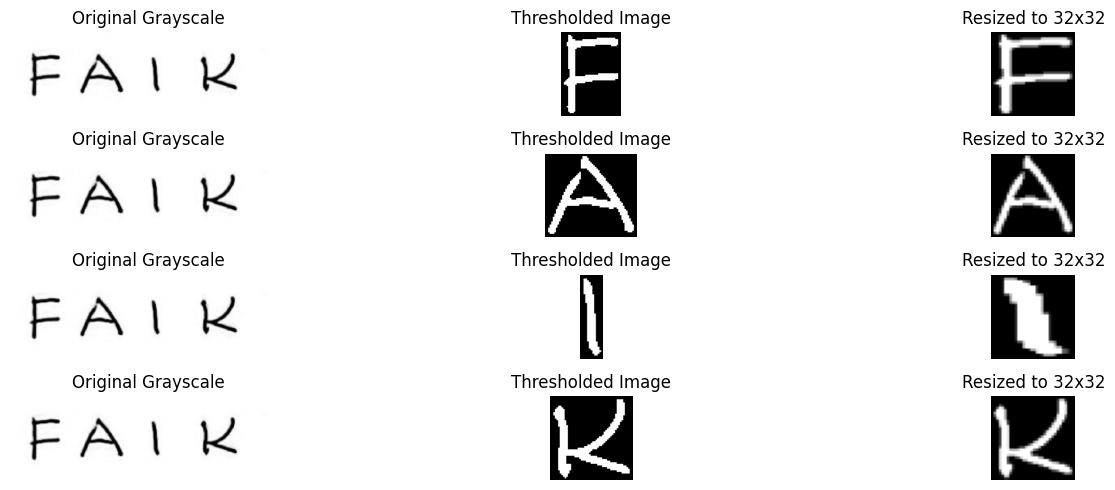

letter 2 
TAKK


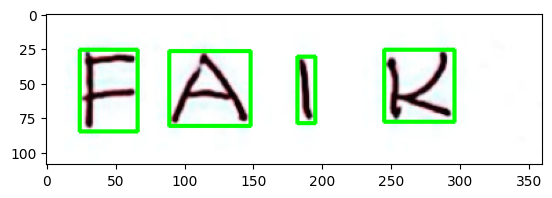

In [48]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\FAIK.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(59, 44)
(59, 44)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.99990106
['H']
(61, 58)
(61, 58)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99999976
['A']
(53, 52)
(53, 52)
(32, 32)
1/1 [==============================] - 0s 13ms/step
high confidence 0.99999964
['K']
(49, 49)
(49, 49)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 1.0
['A']
(50, 59)
(50, 59)
(32, 32)
1/1 [==============================] - 0s 23ms/step
high confidence 0.99905854
['N']


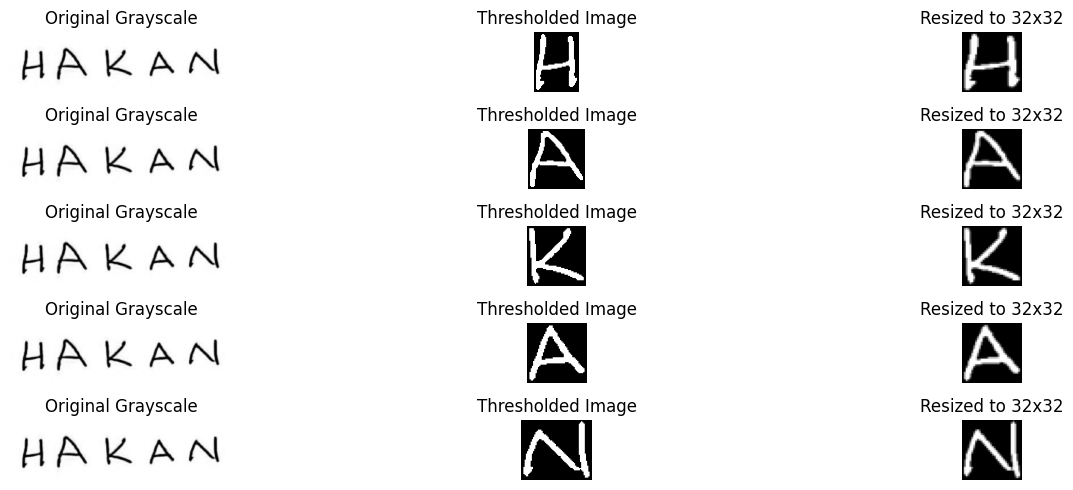

letter 2 
HAKAN


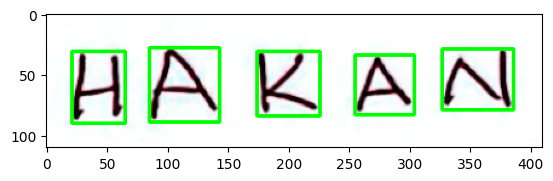

In [49]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\HAKAN.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(92, 48)
(92, 48)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 1.0
['K']
(72, 55)
(72, 55)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.97361505
['E']
(73, 52)
(73, 52)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9939996
['R']
(63, 44)
(63, 44)
(32, 32)
1/1 [==============================] - 0s 17ms/step
high confidence 0.8470162
['E']
(53, 97)
(53, 97)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99801624
['M']


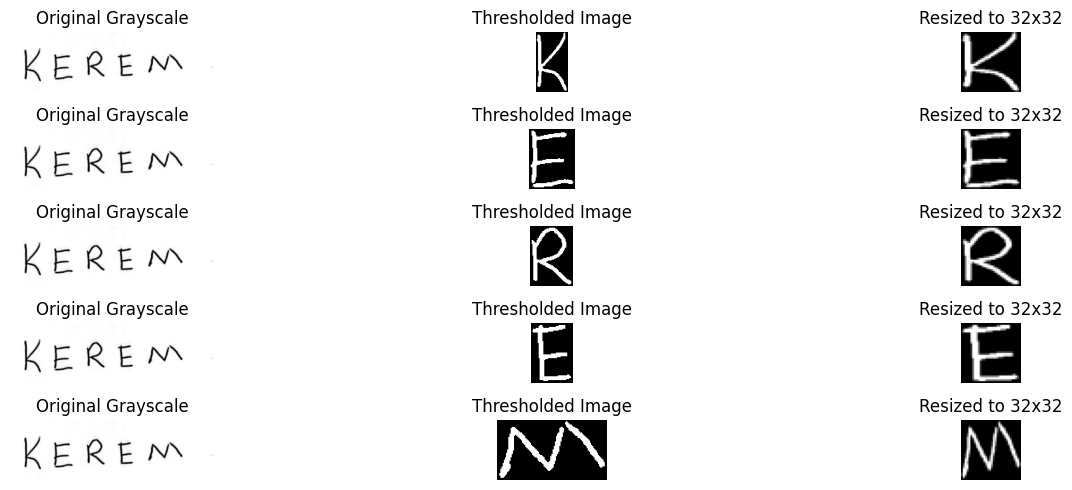

letter 2 
KEREM


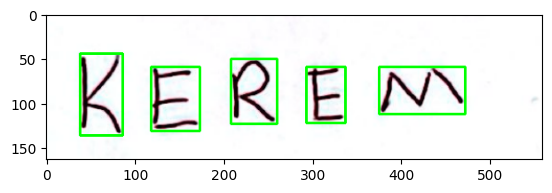

In [50]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\KEREM.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(75, 117)
(75, 117)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9244508
['M']
(72, 46)
(72, 46)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99997795
['A']
(63, 43)
(63, 43)
(32, 32)
1/1 [==============================] - 0s 21ms/step
Low confidence: 0.568742
['M']
(51, 61)
(51, 61)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.8956853
['M']
(45, 41)
(45, 41)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.80949235
['V']
(51, 52)
(51, 52)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99086493
['T']


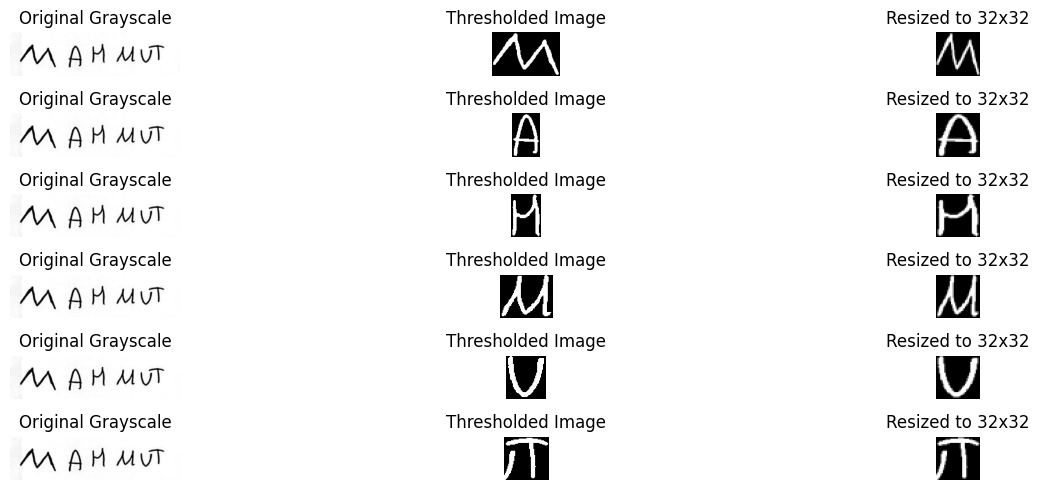

letter 2 
MAMMVT


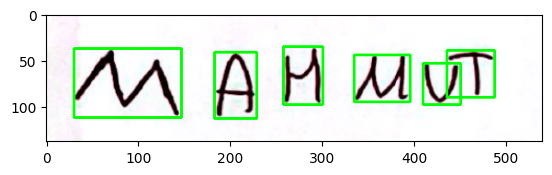

In [51]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\MAHMUT.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(62, 72)
(62, 72)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.96748215
['M']
(58, 32)
(58, 32)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9974342
['E']
(76, 36)
(76, 36)
(32, 32)
1/1 [==============================] - 0s 19ms/step
Low confidence: 0.45266682
['D']
(68, 53)
(68, 53)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9999999
['T']


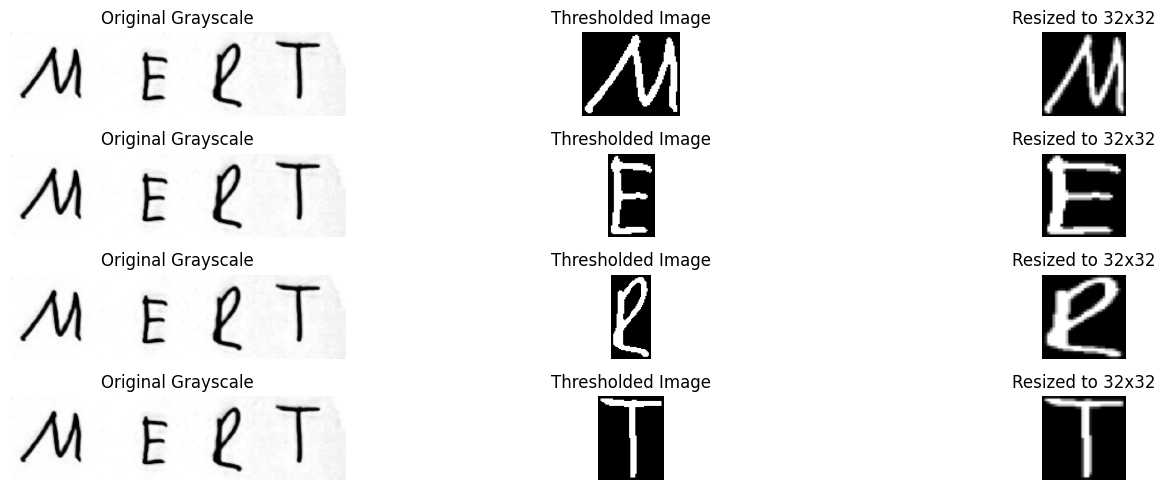

letter 2 
MEDT


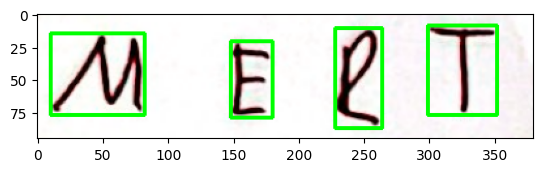

In [52]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\MERT.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(68, 79)
(68, 79)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.9759971
['M']
(60, 43)
(60, 43)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.74660784
['I']
(56, 57)
(56, 57)
(32, 32)
1/1 [==============================] - 0s 17ms/step
high confidence 0.99999976
['T']
(62, 43)
(62, 43)
(32, 32)
1/1 [==============================] - 0s 23ms/step
high confidence 0.993602
['I']


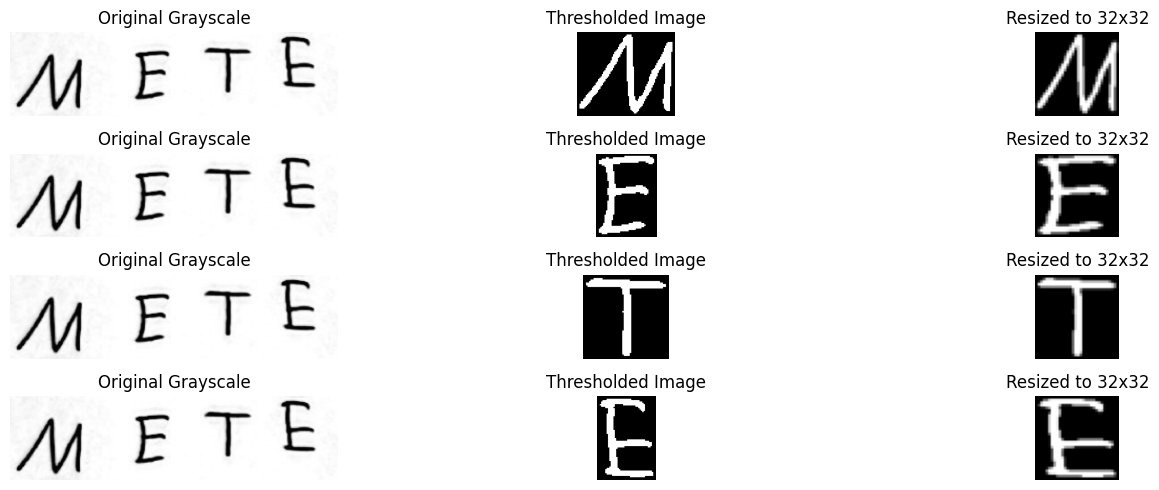

letter 2 
MITI


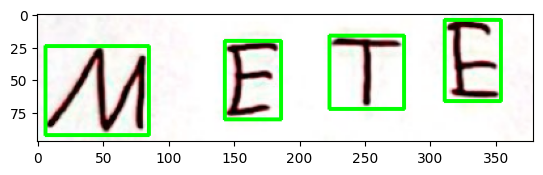

In [53]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\METE.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(61, 58)
(61, 58)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.99784493
['D']
(56, 73)
(56, 73)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99999464
['G']
(49, 51)
(49, 51)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.9173876
['V']
(60, 52)
(60, 52)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9997062
['Z']


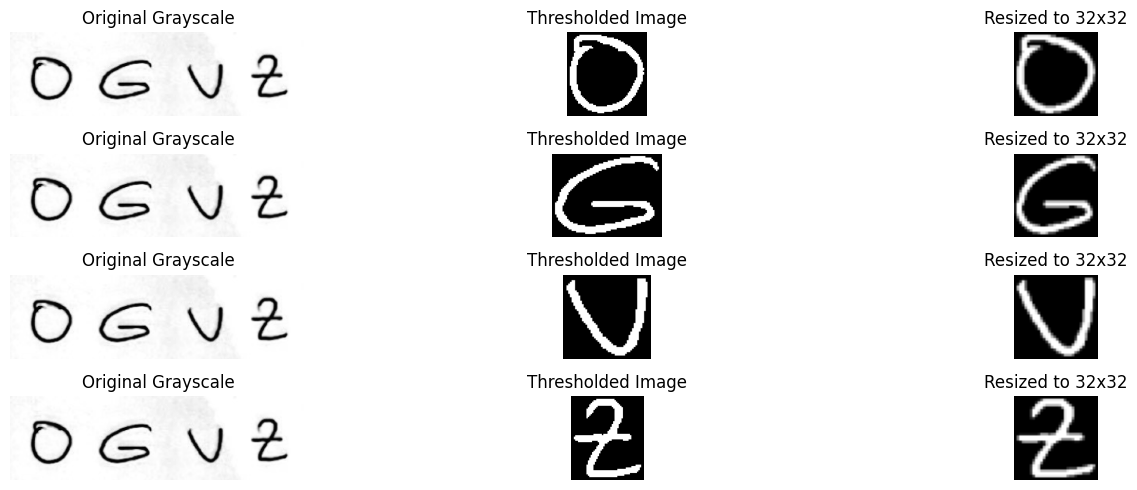

letter 2 
DGVZ


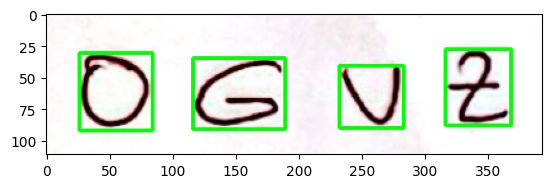

In [54]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\OGUZ.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(58, 60)
(58, 60)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.8643773
['D']
(61, 54)
(61, 54)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99999857
['Z']
(65, 43)
(65, 43)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 0.9999987
['A']
(60, 59)
(60, 59)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.9995778
['N']


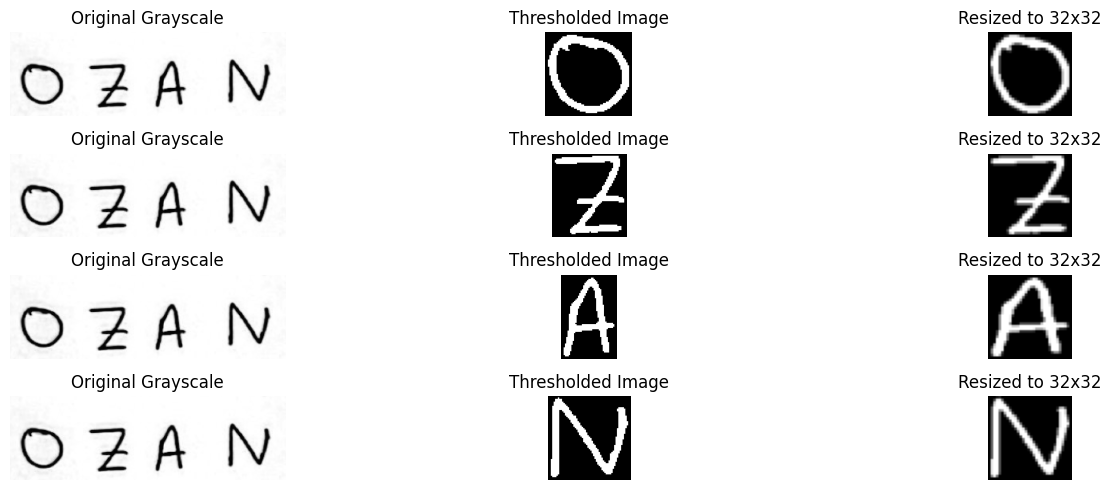

letter 2 
DZAN


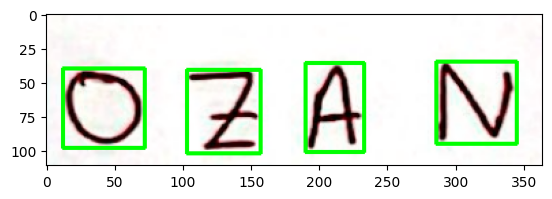

In [55]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\OZAN.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(103, 49)
(103, 49)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.99999213
['P']
(63, 33)
(63, 33)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.9993806
['E']
(60, 47)
(60, 47)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9999995
['L']
(50, 12)
(50, 12)
(32, 32)
1/1 [==============================] - 0s 26ms/step
high confidence 0.8902728
['E']
(63, 50)
(63, 50)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 0.99995816
['N']
(58, 39)
(58, 39)
(32, 32)
1/1 [==============================] - 0s 23ms/step
high confidence 0.74113023
['J']
(45, 40)
(45, 40)
(32, 32)
1/1 [==============================] - 0s 21ms/step
Low confidence: 0.55867034
['U']


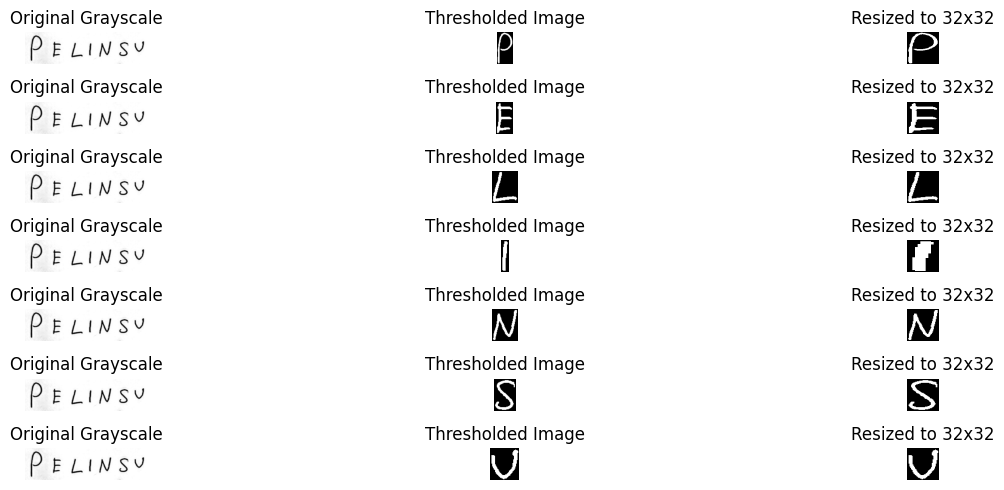

letter 2 
PELENJU


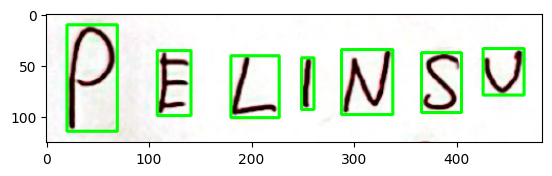

In [56]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\PELINSU.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(83, 67)
(83, 67)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.9997538
['S']
(68, 42)
(68, 42)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9956814
['E']
(68, 55)
(68, 55)
(32, 32)
1/1 [==============================] - 0s 24ms/step
high confidence 1.0
['C']
(62, 47)
(62, 47)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9993724
['K']
(63, 10)
(63, 10)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.9712644
['I']
(70, 71)
(70, 71)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.99325174
['N']


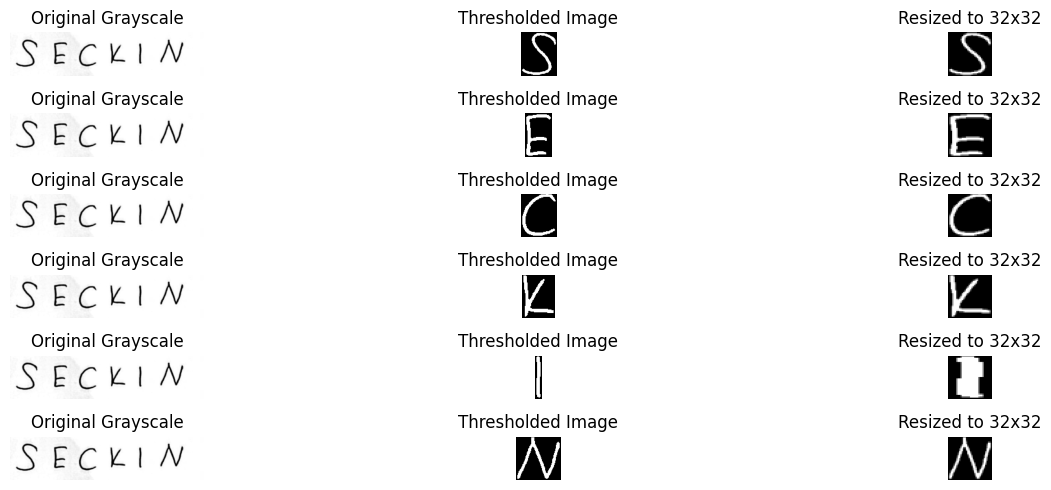

letter 2 
SECKIN


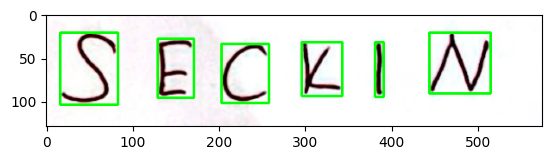

In [57]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\SECKIN.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(64, 63)
(64, 63)
(32, 32)
1/1 [==============================] - 0s 27ms/step
high confidence 0.9999999
['T']
(55, 57)
(55, 57)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.9993436
['E']
(62, 61)
(62, 61)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 1.0
['K']


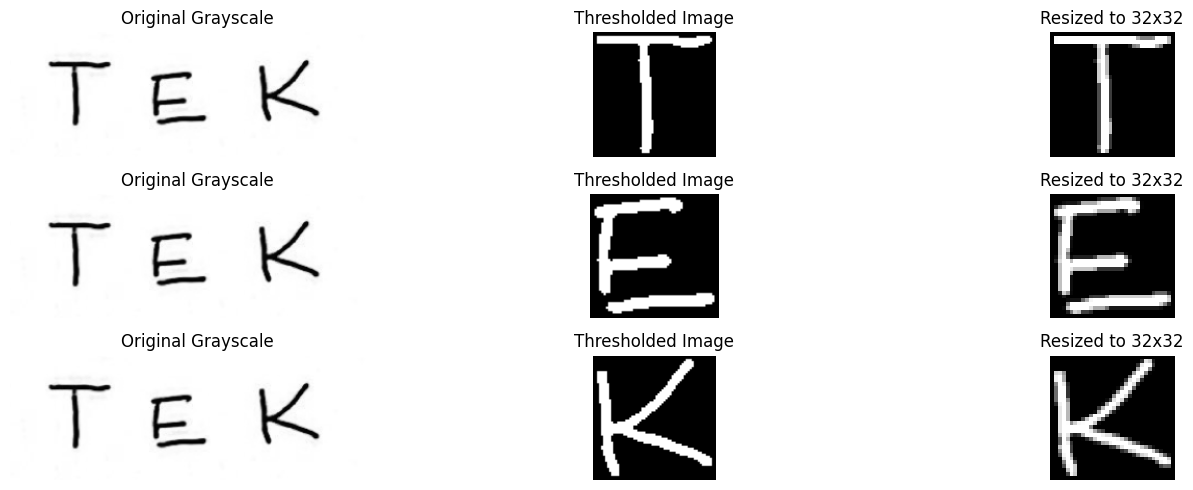

letter 2 
TEK


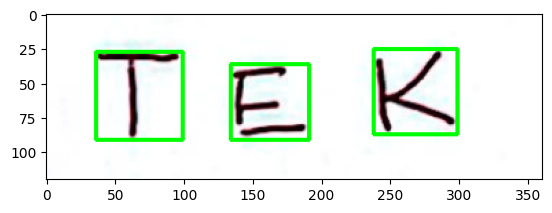

In [58]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\TEK.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(101, 66)
(101, 66)
(32, 32)
1/1 [==============================] - 0s 22ms/step
high confidence 0.99999964
['Y']
(78, 20)
(78, 20)
(32, 32)
1/1 [==============================] - 0s 20ms/step
Low confidence: 0.43540642
['I']
(69, 61)
(69, 61)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 0.99976116
['G']
(65, 12)
(65, 12)
(32, 32)
1/1 [==============================] - 0s 25ms/step
high confidence 0.92601544
['Z']
(61, 57)
(61, 57)
(32, 32)
1/1 [==============================] - 0s 21ms/step
high confidence 1.0
['T']
(66, 53)
(66, 53)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99955887
['H']
(68, 42)
(68, 42)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99999964
['A']
(62, 53)
(62, 53)
(32, 32)
1/1 [==============================] - 0s 18ms/step
high confidence 0.9997615
['N']


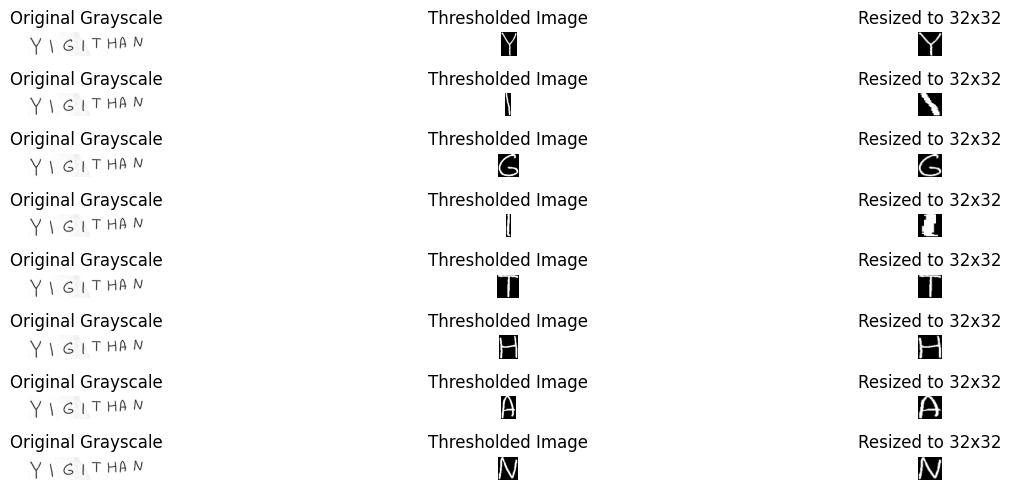

letter 2 
YIGZTHAN


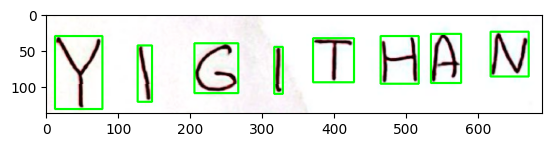

In [59]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\YIGITHAN.png")
word = get_word(letter)
print(word)
plt.imshow(image)

(102, 48)
(102, 48)
(32, 32)
1/1 [==============================] - 0s 19ms/step
high confidence 0.99999523
['Y']
(73, 60)
(73, 60)
(32, 32)
1/1 [==============================] - 0s 21ms/step
Low confidence: 0.66872144
['U']
(75, 58)
(75, 58)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.9998847
['N']
(62, 47)
(62, 47)
(32, 32)
1/1 [==============================] - 0s 18ms/step
Low confidence: 0.6073857
['V']
(57, 39)
(57, 39)
(32, 32)
1/1 [==============================] - 0s 20ms/step
high confidence 0.99437827
['S']


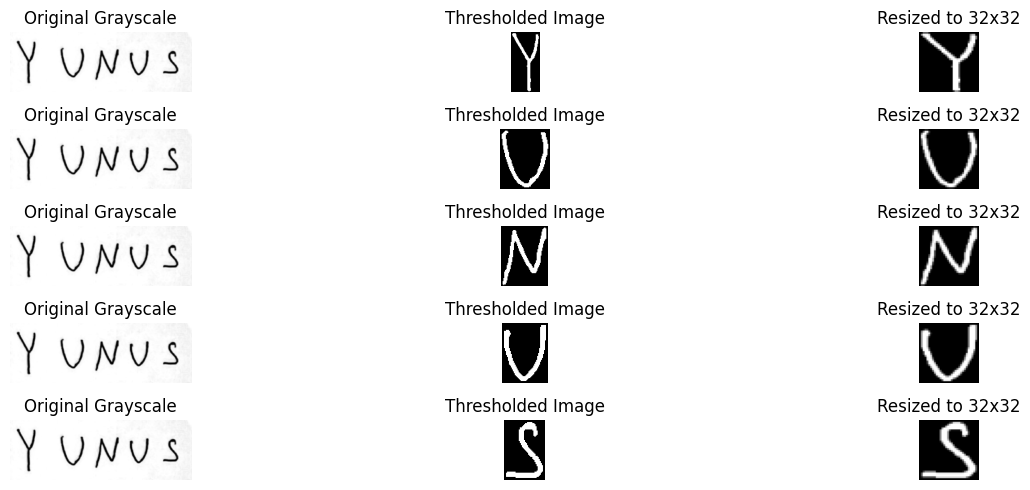

letter 2 
YUNVS


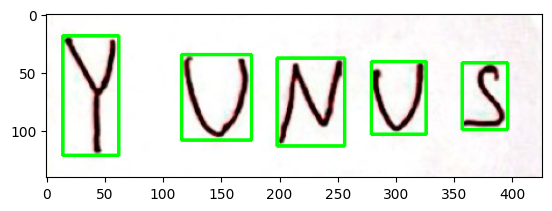

In [60]:
letter,image = get_letters2(r"C:\Users\furka\Desktop\test_dl_proje\YUNUS.png")
word = get_word(letter)
print(word)
plt.imshow(image)

In [31]:
model2.save("handwritefurkan_berkin_50ep.h5",save_format="h5")

In [32]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])